In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

pd.set_option("display.max_columns", 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

sns.set_style("darkgrid")

# (Optional) Suppress FutureWarning
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Load employee data from CSV
df = pd.read_csv("employee_data.csv")

## Exploratory Analysis

In [13]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [12]:
df.head(5)
df.tail(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14244,178,IT,0.0,0.735865,5,0.0,low,0.263282,Employed,5.0
14245,257,sales,0.0,0.638604,3,0.0,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,0.0,medium,0.898917,Left,5.0
14247,130,IT,0.0,0.757184,4,0.0,medium,0.641304,Employed,3.0
14248,159,NaN,0.0,0.578742,3,0.0,medium,0.808850,Employed,3.0


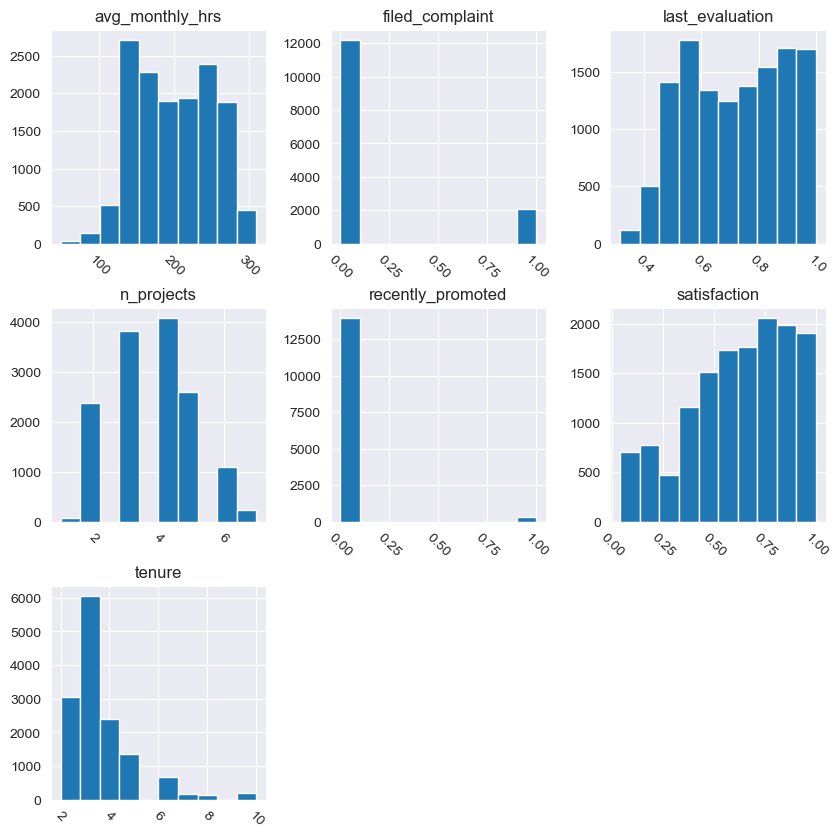

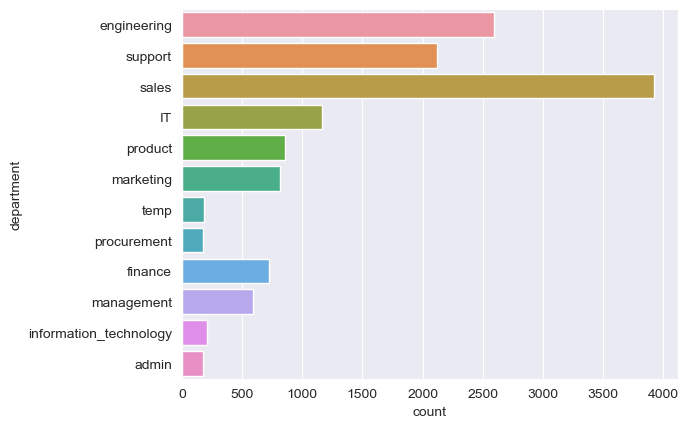

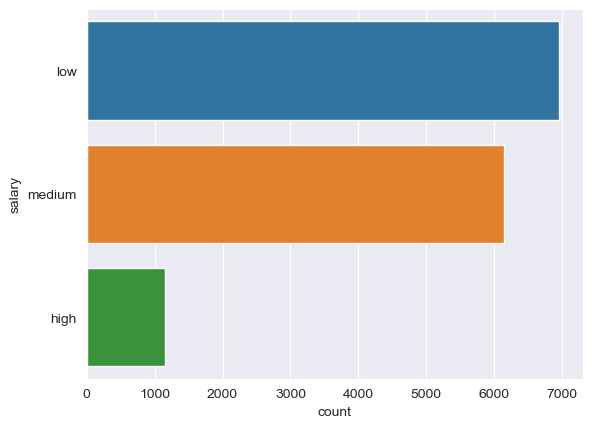

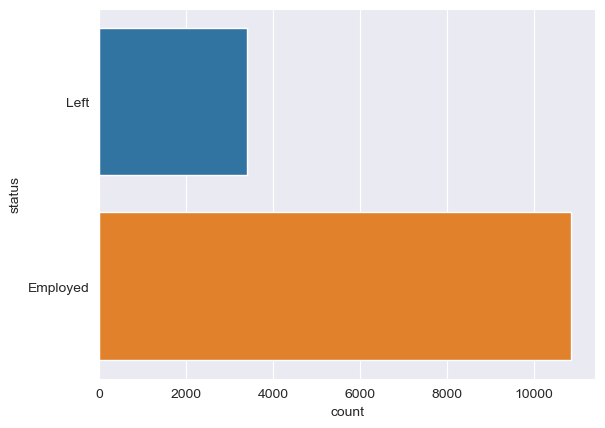

In [8]:
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)

# Distributions of Numeric Features
# Plot histogram grid
df.hist(figsize=(10, 10), xrot=-45)

# Clear the text "residue"
plt.show()

# Summarize numerical features
df.describe()

# Summarize categorical features
df.describe(include=['object'])

# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == "object"].index:
    sns.countplot(y=feature, data=df)
    plt.show()
# Ad-Hoc Feature Engineering
df["salary_numeric"] = df.salary.replace({"low": 0, "medium": 1, "high": 2})

## Segmentation

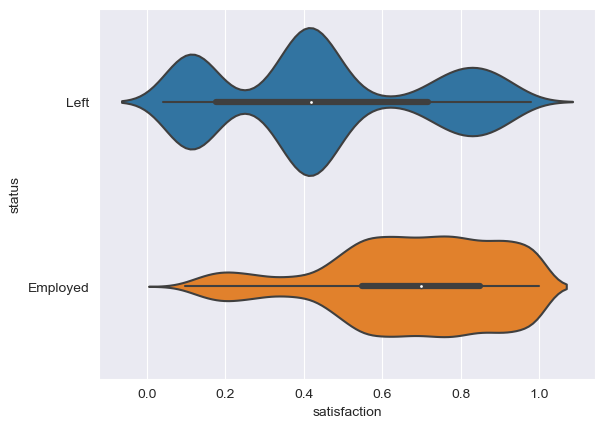

In [4]:
# univariate segmentations because we are only displaying the distribution of one variable at a time after segmenting.
sns.violinplot(y="status", x="satisfaction", data=df)
plt.show()


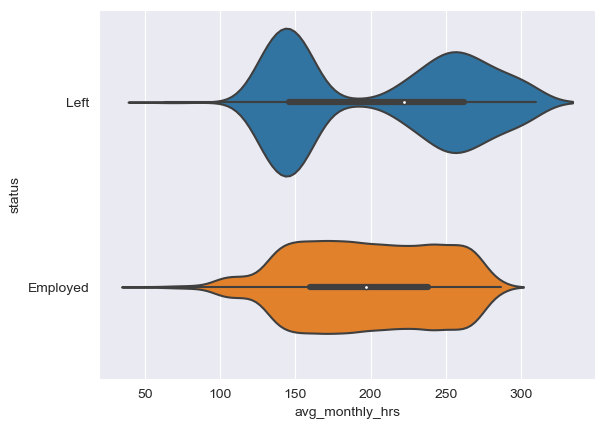

In [5]:
# Segment avg_monthly_hrs by status and plot distributions
sns.violinplot(y="status", x="avg_monthly_hrs", data=df)
plt.show()

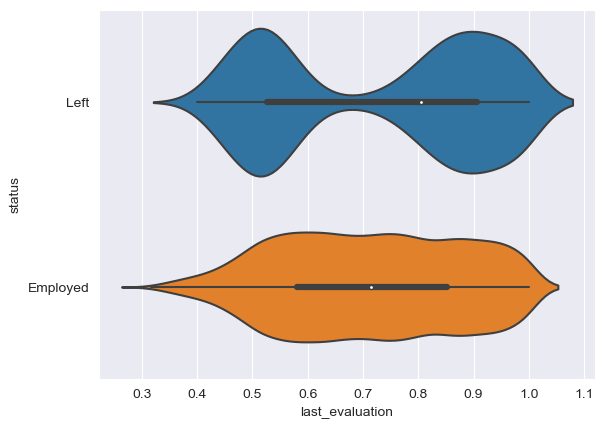

In [6]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(y="status", x="last_evaluation", data=df)
plt.show()

In [15]:
# Ad-Hoc Feature Engineering
df["salary_numeric"] = df.salary.replace({"low": 0, "medium": 1, "high": 2})
# Segment by status and display the means within each class
df.groupby('status').mean(numeric_only=True)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
status,,,,,,,,
Employed,197.700286,0.175187,0.714479,3.755273,0.025974,0.675979,3.380245,0.648061
Left,206.502948,0.045991,0.730706,3.833137,0.005307,0.447500,3.869023,0.416274


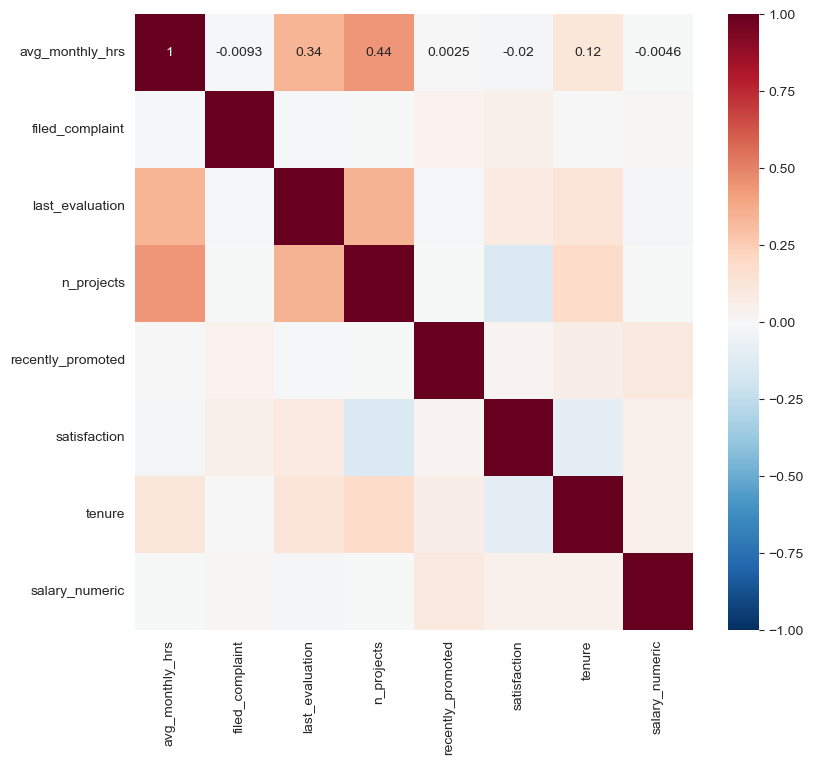

In [18]:
corr = df.corr(numeric_only=True)

sns.set_style("whitegrid")
plt.figure(figsize=(9, 8))
sns.heatmap(corr, annot=True, cmap="RdBu_r", vmin=-1, vmax=1)
plt.show()

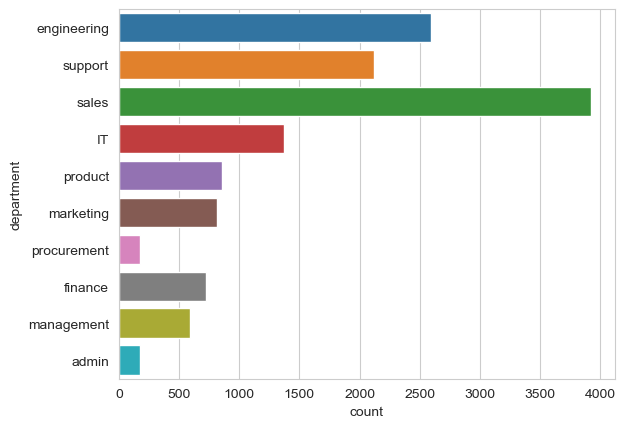

In [19]:
df.department.replace("information_technology", "IT", inplace=True)
df = df[df.department != "temp"]
sns.countplot(y="department", data=df)
plt.show()

In [21]:
df.groupby("department").mean(numeric_only=True).sort_values(by="avg_monthly_hrs")

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
department,,,,,,,,
procurement,199.482759,0.183908,0.699205,3.885057,0.057471,0.627930,3.264368,0.557471
marketing,199.664225,0.159951,0.715018,3.687424,0.048840,0.629122,3.567766,0.620269
product,199.991860,0.151163,0.719616,3.817442,0.000000,0.628774,3.487209,0.577907
sales,200.842467,0.141728,0.711254,3.772878,0.024726,0.623075,3.527148,0.556207
support,200.975495,0.155042,0.723200,3.804430,0.008483,0.626923,3.394910,0.554194
management,201.025210,0.173109,0.729714,3.857143,0.114286,0.630428,4.294118,1.057143
finance,201.175824,0.119505,0.723880,3.815934,0.019231,0.586787,3.543956,0.641484
admin,201.272727,0.096591,0.726282,3.897727,0.028409,0.611450,3.369318,0.596591
IT,202.174453,0.140876,0.720017,3.810219,0.005109,0.628079,3.456204,0.572263


## Advanced segmentation

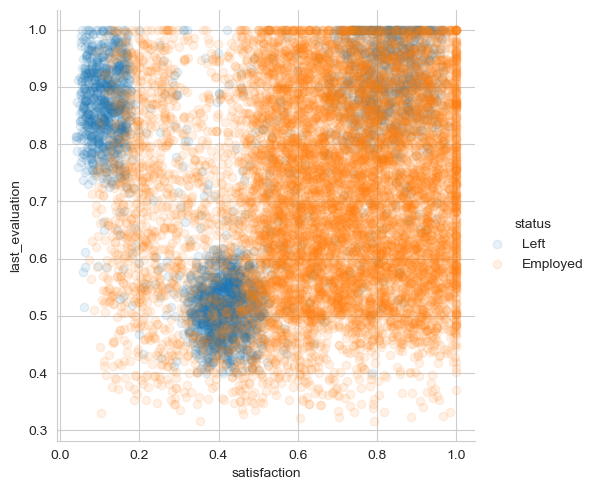

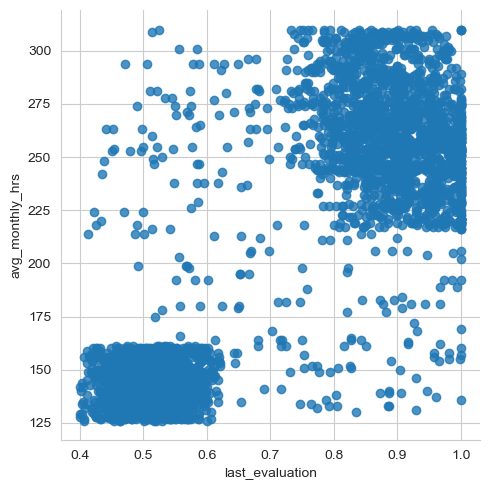

In [22]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(
    x="satisfaction",
    y="last_evaluation",
    hue="status",
    data=df,
    fit_reg=False,
    scatter_kws={"alpha": 0.1},
)
plt.show()

# Scatterplot of last_evaluation vs. avg_monthly_hrs for leavers
sns.lmplot(
    x="last_evaluation",
    y="avg_monthly_hrs",
    data=df[df.status == "Left"],
    fit_reg=False,
)
plt.show()